[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/statistics/dispersion.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# Dispersion

Dispersion measures how spread out the data are. It is a measure of how much the data in a dataset varies. 

In [101]:
# make sure the required packages are installed
%pip install pandas seaborn matplotlib --quiet
# if running in colab, install the required packages and copy the necessary files
directory='data-science-course/statistics'
if get_ipython().__class__.__module__.startswith('google.colab'):
    !git clone --depth 1 https://github.com/francisco-ortin/data-science-course.git  2>/dev/null
    !cp --update {directory}/*.py .
    !mkdir -p img data
    !cp {directory}/img/* img/.
    !cp {directory}/data/* data/.

## Dataset

We will use the Titanic dataset, which contains information about the passengers of the Titanic. The dataset is available at the seaborn library.

In [102]:
# get the titanic dataset from seaborn
import seaborn as sns
titanic_df = sns.load_dataset('titanic')
print(f"Shape of the dataset: {titanic_df.shape}.")
titanic_df.head(10)

Shape of the dataset: (891, 15).


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## Frequency distribution

For categorical (qualitative) data, dispersion can be measured with frequencies. The frequency distribution is a table that shows the number of instances in a dataset for each category. Pandas provides the `value_counts` method to calculate the frequency distribution. 

In [103]:
# show the frequency distribution of the 'class' column
print(f"Values for the class variable: {titanic_df['class'].unique()}.")
print("Frequency distribution for class:")
titanic_df['class'].value_counts()

Values for the class variable: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third'].
Frequency distribution for class:


class
Third     491
First     216
Second    184
Name: count, dtype: int64

A contingency table is a frequency distribution for two or more variables. It shows the number of instances for each combination of values. Pandas provides the `crosstab` method to calculate the contingency table.

In [104]:
import pandas as pd
# show the contingency table for the 'class' and 'embark_town' columns
print("Contingency table for class and embark_town:")
pd.crosstab(titanic_df['class'], titanic_df['embark_town'])

Contingency table for class and embark_town:


embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


## Range

The range is the difference between the maximum and minimum values in a dataset. It is a simple measure of dispersion tha is valid for numerical (quantitative) data. Pandas provides the `max` and `min` methods.

In [105]:
fare_range = titanic_df['fare'].max() - titanic_df['fare'].min()
fare_age = titanic_df['age'].max() - titanic_df['age'].min()
print(f"Fare range: {fare_range:.2f}.\nAge range: {fare_age:.2f}.")

Fare range: 512.33.
Age range: 79.58.


If we want to know the maximum and minimum instance for a given column, we can use the `idxmax` and `idxmin` methods.

In [106]:
# Let's add an outlier for the fare column
# we take the index with the greatest fare value
greatest_fare_index = titanic_df['fare'].idxmax()
# we set the fare value to 1M
previous_highest_fare = titanic_df.loc[greatest_fare_index, 'fare']
titanic_df.loc[greatest_fare_index, 'fare'] = 1_000_000  # outlier

print(f"New fare range with an outlier: {titanic_df['fare'].max() - titanic_df['fare'].min():.2f}"
            f" (previously: {fare_range:.2f}).")

New fare range with an outlier: 1000000.00 (previously: 512.33).


## Percentiles

A percentile is the value below which a given percentage of observations fall. Pandas provides the `quantile` method to calculate the percentiles. 

In [107]:
# calculate the 90th percentile for the 'fare' column
print(f"90th percentile for the 'fare' variable: {titanic_df['fare'].quantile(0.9)}.")
print(f"10th percentile for the 'fare' variable: {titanic_df['fare'].quantile(0.1)}.")

90th percentile for the 'fare' variable: 77.9583.
10th percentile for the 'fare' variable: 7.55.


## Quartiles

Quartiles are percentiles that divide the data into four equal parts. The first quartile (Q1) is the 25th percentile, the second quartile (Q2) is the 50th percentile (median), and the third quartile (Q3) is the 75th percentile. 

In [108]:
import utils    
grouped_by_sex_df = titanic_df.groupby('sex')
print("Five-number summary for the 'age' variable, grouping by 'sex'.\nMale:")
utils.five_number_summary(grouped_by_sex_df.get_group('male')['age'], show=True)
print("Female:")
utils.five_number_summary(grouped_by_sex_df.get_group('female')['age'], show=True)

Five-number summary for the 'age' variable, grouping by 'sex'.
Male:
	Minimum: 0.42.
	1st quartile (Q1): 21.0.
	Median (Q2): 29.0.
	3rd quartile (Q3): 39.0.
	Maximum: 80.0.
Female:
	Minimum: 0.75.
	1st quartile (Q1): 18.0.
	Median (Q2): 27.0.
	3rd quartile (Q3): 37.0.
	Maximum: 63.0.


(0.75, 18.0, 27.0, 37.0, 63.0)

## Box plots

Box plots are a graphical representation of the five-number summary. They are useful to identify outliers and compare the distribution of different groups. Seaborn provides the `boxplot` function.

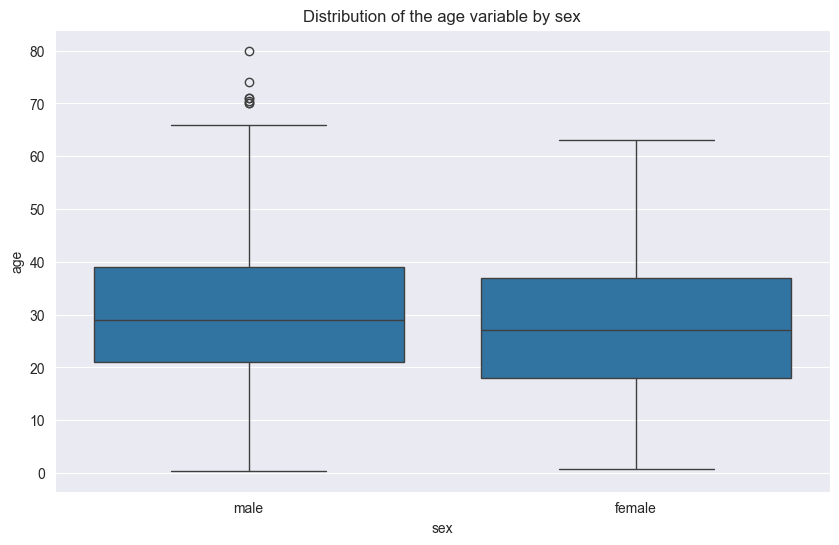

In [109]:
# show the box plot for the 'age' column, grouping by sex.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_df, x='sex', y='age')  # switch x and y to show it horizontally
plt.title('Distribution of the age variable by sex')
plt.show()

## Interquartile range

The interquartile range (IQR) is the difference between the third and first quartiles (Q3 - Q1). It is a measure of dispersion that is robust to outliers. 

IQR is also used to identify outliers with the Tukey's fences rule. The variable must be numerical, symmetrically distributed, and unimodal (i.e., one single peek value). The outliers are the values that are below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.  

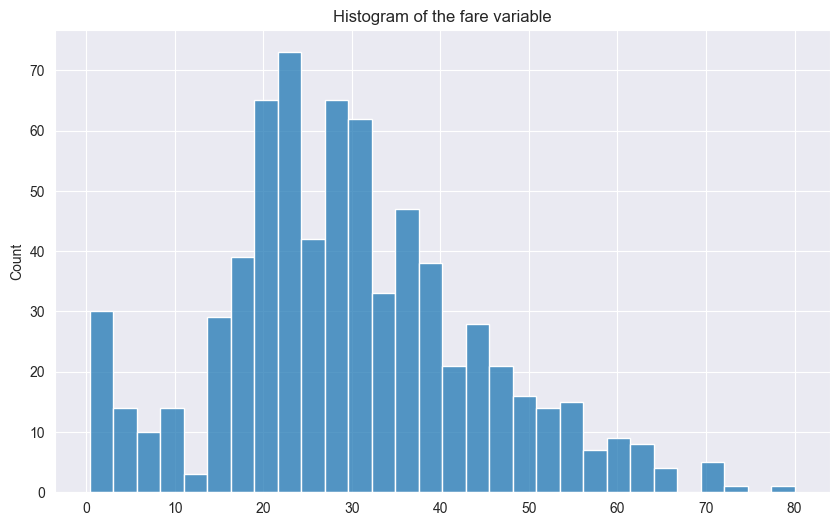

In [110]:
# Let's see if the age variable is symmetrically distributed
# show histogram of the age variable
plt.figure(figsize=(10, 6))
sns.histplot(x=titanic_df['age'].values, bins=30)
plt.title('Histogram of the fare variable')
plt.show()

In [111]:
# compute the outliers for the 'age' variable
def compute_ouliers(column: pd.Series) -> pd.Series:
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return column[(column < lower_bound) | (column > upper_bound)]

age_outliers = compute_ouliers(titanic_df['age'])
print(f"Number of outliers for the 'age' variable: {age_outliers.shape[0]} "
      f"out of {titanic_df.shape[0]}.")
print(f"Outliers:\n{age_outliers}.")

Number of outliers for the 'age' variable: 11 out of 891.
Outliers:
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64.


## Variance and standard deviation

Variance and standard deviation are dispersion measures for numerical (quantitative) data. Variance is the average of the squared differences between each value and the mean. The standard deviation is the square root of the variance.

In [112]:
# calculate the variance and standard deviation for the 'age' and 'fare' variables
# we do not consider the outlier we added artificially
original_df = titanic_df[titanic_df['fare'] != 1_000_000]
age_variance, fare_variance = original_df['age'].var(), original_df['fare'].var()
age_std, fare_std = original_df['age'].std(), original_df['fare'].std()
print(f"Variance for the 'age' variable: {age_variance:.2f} (std: {age_std:.2f}).")
print(f"Variance for the 'fare' variable: {fare_variance:.2f} (std: {fare_std:.2f}).")
print("Which variable has more dispersion?")

Variance for the 'age' variable: 211.28 (std: 14.54).
Variance for the 'fare' variable: 2212.62 (std: 47.04).
Which variable has more dispersion?


## Coefficient of variation

The coefficient of variation is the ratio of the standard deviation to the mean. It is a relative measure of dispersion that allows comparing the variability of different variables. Since we are dividing the variables, they must be on a ratio scale.

In [113]:
# calculate the coefficient of variation for the 'age' and 'fare' variables
age_cv, fare_cv = age_std / original_df['age'].mean(), fare_std / original_df['fare'].mean()
print(f"Coefficient of variation for the 'age' variable: {age_cv:.4f} ({age_cv*100:.2f}%).")
print(f"Coefficient of variation for the 'fare' variable: {fare_cv:.4f} ({fare_cv*100:.2f}%).")
print(f"The variable '{['age', 'fare'][int(age_cv < fare_cv)]}' has more dispersion.")

Coefficient of variation for the 'age' variable: 0.4895 (48.95%).
Coefficient of variation for the 'fare' variable: 1.4855 (148.55%).
The variable 'fare' has more dispersion.
